In [1]:
from apts import *
%matplotlib inline  

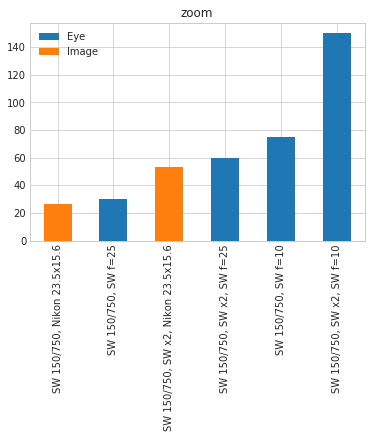

In [2]:
e = Equipment()

sky_watcher = "SW"

e.register(equipment.Camera(23.5, 15.6, 6000, 4000, "Nikon"))
e.register(equipment.Telescope(150, 750, sky_watcher, t2_output = True))
e.register(equipment.Barlow(2, sky_watcher, t2_output = True))
#e.register(equipment.Barlow(3, sky_watcher, t2_output = True))
e.register(equipment.Eyepiece(25, sky_watcher))
e.register(equipment.Eyepiece(10, sky_watcher))
#e.register(equipment.Eyepiece(6, sky_watcher))

e.plot('zoom')

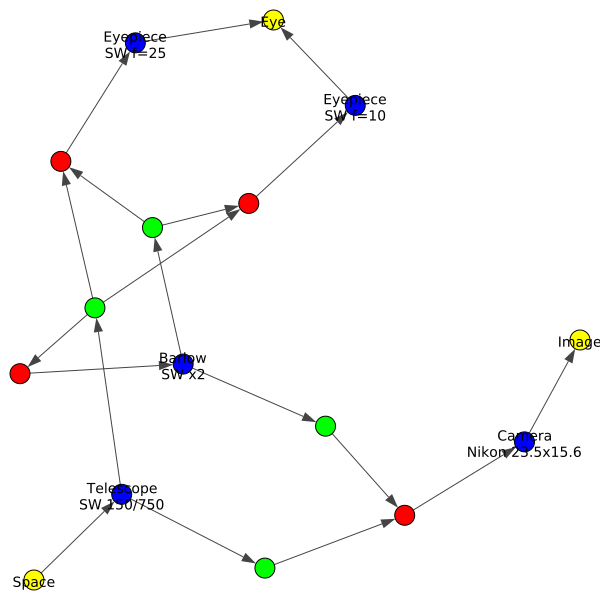

In [3]:
e.plot_connection_garph()

In [4]:
data = e.data()
data[data.useful_zoom == True].sort_values(['fov'], ascending=[0])

,label,type,zoom,useful_zoom,fov,range,brightness,elements
2,"SW 150/750, SW f=25",Eye,30.00000,True,1.733333,12.880456,51.020408,2
5,"SW 150/750, Nikon 23.5x15.6",Image,26.58956,True,1.191840,12.880456,64.947755,2
0,"SW 150/750, SW x2, SW f=25",Eye,60.00000,True,0.866667,12.880456,12.755102,3
3,"SW 150/750, SW f=10",Eye,75.00000,True,0.693333,12.880456,8.163265,2
4,"SW 150/750, SW x2, Nikon 23.5x15.6",Image,53.17912,True,0.595920,12.880456,16.236939,3
1,"SW 150/750, SW x2, SW f=10",Eye,150.00000,True,0.346667,12.880456,2.040816,3


In [5]:
observations.Conditions.MIN_TEMPERATURE = -10

place = Place(lat=50.1637973, lon=19.7855169, name="Example place")
o = Observation(place,e)

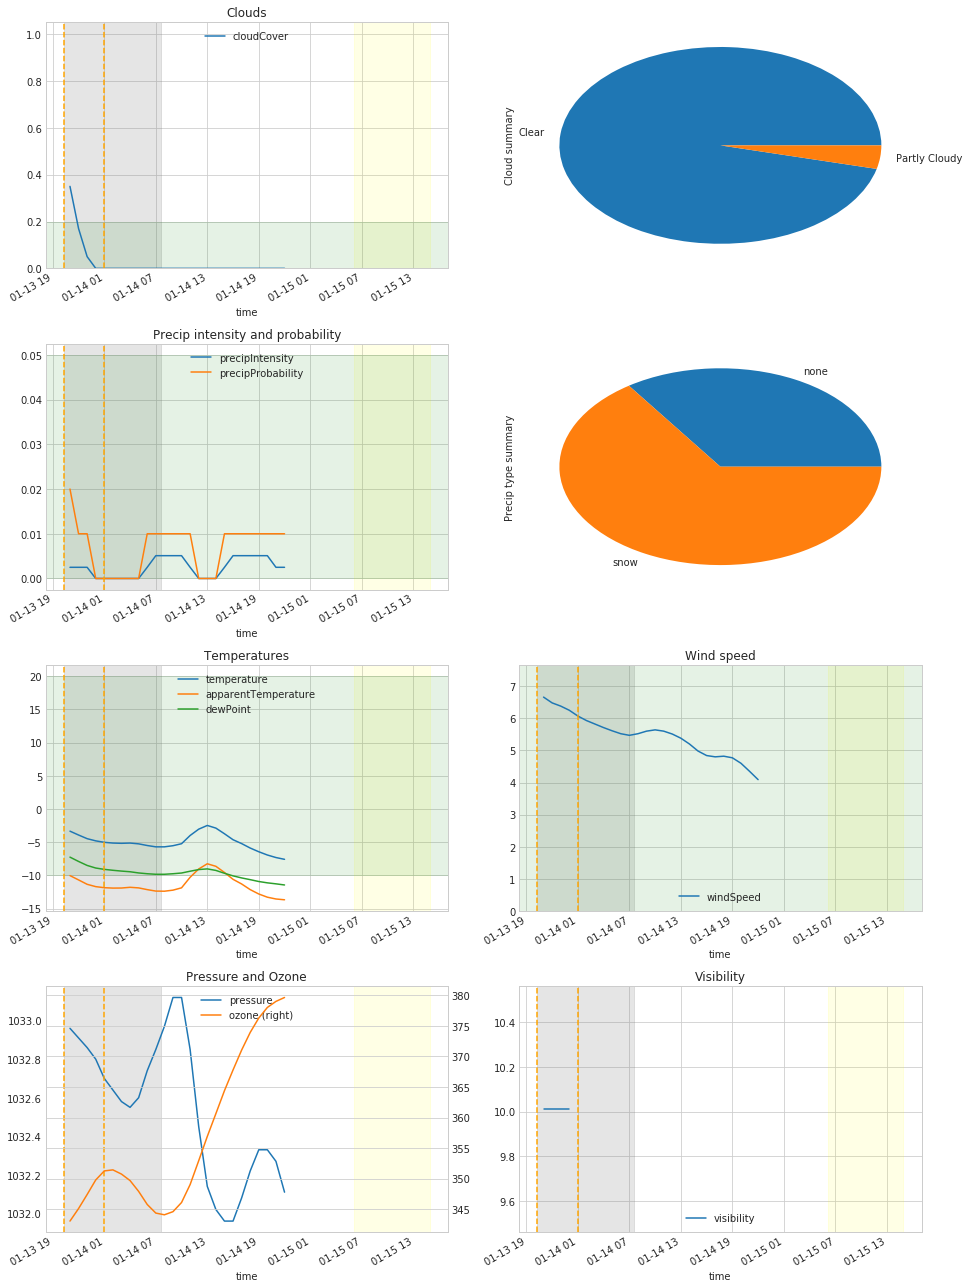

In [6]:
o.plot_weather()

In [7]:
o.weather_is_good()

False

In [8]:
#n = Notify('lpozarlik@gmail.com')
#n.send(o)

In [15]:
o.get_visible_messier()

,Messier,Name,NGC,Type,Constellation,Magnitude,Distance,RA,Dec,Width,Height,Transit,Altitude
78,M79,-,NGC 1904,Globular Cluster,Lepus,7.7,41100,5.408333,-24.550000,8.7,8.7,2018-01-13 21:33:02.405599+01:00,15.355006
37,M38,-,NGC 1912,Open Cluster,Auriga,7.4,4200,5.478333,35.833333,21.0,21.0,2018-01-13 21:37:41.671128+01:00,75.685743
0,M1,Crab Nebula,NGC 1952,Supernova Remnant,Taurus,8.4,6300,5.575000,22.016667,6.0,4.0,2018-01-13 21:43:21.084120+01:00,61.870312
41,M42,Great Orion Nebula,NGC 1976,Diffuse Nebula,Orion,4.0,1600,5.590000,-5.450000,85.0,60.0,2018-01-13 21:44:03.030889+01:00,34.416674
35,M36,-,NGC 1960,Open Cluster,Auriga,6.3,4100,5.601667,34.133333,12.0,12.0,2018-01-13 21:45:03.460559+01:00,73.982895
77,M78,-,NGC 2068,Diffuse Nebula,Orion,8.3,1600,5.778333,0.050000,8.0,6.0,2018-01-13 21:55:21.479990+01:00,39.907846
36,M37,-,NGC 2099,Open Cluster,Auriga,6.2,4400,5.873333,32.550000,24.0,24.0,2018-01-13 22:01:17.922929+01:00,72.392731
34,M35,-,NGC 2168,Open Cluster,Gemini,5.3,2800,6.148333,24.333333,28.0,28.0,2018-01-13 22:17:40.709144+01:00,64.171089
40,M41,-,NGC 2287,Open Cluster,Canis Major,4.6,2300,6.783333,-20.733333,38.0,38.0,2018-01-13 22:55:21.013647+01:00,19.125117
49,M50,-,NGC 2323,Open Cluster,Monocerus,6.3,3000,7.053333,-8.333333,16.0,16.0,2018-01-13 23:11:35.726197+01:00,31.498691


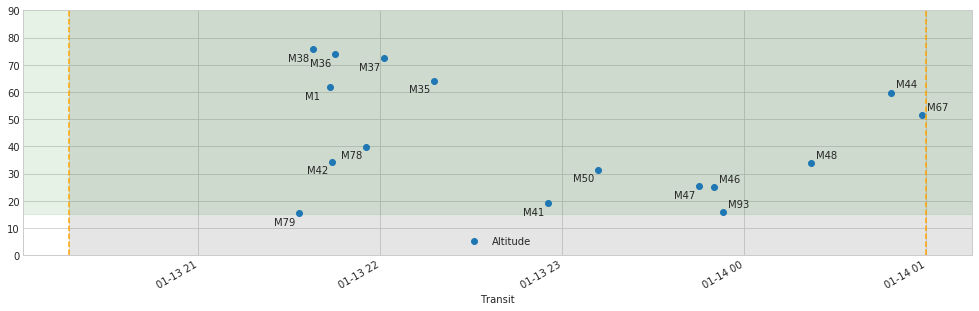

In [10]:
o.plot_messier()

In [11]:
#o.get_visible_messier().to_html('/tmp/list.html')

In [12]:
import numpy as np
import time
from datetime import datetime
import ephem
# Always get the latest ISS TLE data from:
# http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
iss = ephem.readtle('ISS',
    '1 25544U 98067A   17289.56535255  .00016717  00000-0  10270-3 0  9000',
    '2 25544  51.6389 153.2478 0004983  22.1446 337.9921 15.54200052   623'
)
#while True:
#    o.place.date = datetime.utcnow()
#    iss.compute(o.place)
#    print('iss: altitude %4.1f deg, azimuth %5.1f deg' % (np.degrees(iss.alt), np.degrees(iss.az)))
#    time.sleep(1.0)